# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [143]:
# Read in the customer data
import pandas as pd
customers = pd.read_csv('E:/Learning and Development/Data Prep and EDA/Data/music_customers.csv')
customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [144]:
# Read in the listening history
listening_history = pd.read_excel('E:/Learning and Development/Data Prep and EDA/Data/music_listening_history.xlsx')
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [145]:
# Hint: Where might you find listening history data beyond the ID's?

In [146]:
# Read in the audio data
audio = session = pd.read_excel('E:/Learning and Development/Data Prep and EDA/Data/music_listening_history.xlsx', sheet_name = 'audio_files')
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [147]:
# Read in the session data
sessions = pd.read_excel('E:/Learning and Development/Data Prep and EDA/Data/music_listening_history.xlsx', sheet_name = 'session_login_time')
sessions.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [148]:
# Check the data types
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [149]:
# Convert objects to numeric and datetime fields
customers.rename(columns = {
   "Member Since" : "Member_Since",
   "Cancellation Date" : "Cancel_Date" ,
    "Customer ID" : "Customer_ID",
    "Customer Name" : "Customer_Name",
    "Subscription Rate" : "Subscription_Rate",
    "Subscription Plan" : "Subscription_Plan"
}, inplace = True)

customers["Member_Since"] = pd.to_datetime(customers.Member_Since)
customers["Cancel_Date"] = pd.to_datetime(customers.Cancel_Date)

customers.dtypes
                         

Customer_ID                   int64
Customer_Name                object
Email                        object
Member_Since         datetime64[ns]
Subscription_Plan            object
Subscription_Rate            object
Discount?                    object
Cancel_Date          datetime64[ns]
dtype: object

In [150]:
customers["Subscription_Rate"] = pd.to_numeric(customers["Subscription_Rate"].str.replace('$', ''))
customers.head()

C:\Users\DeLL\AppData\Local\Temp\ipykernel_1752\2865492025.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  customers["Subscription_Rate"] = pd.to_numeric(customers["Subscription_Rate"].str.replace('$', ''))


,Customer_ID,Customer_Name,Email,Member_Since,Subscription_Plan,Subscription_Rate,Discount?,Cancel_Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [151]:
customers.dtypes

Customer_ID                   int64
Customer_Name                object
Email                        object
Member_Since         datetime64[ns]
Subscription_Plan            object
Subscription_Rate           float64
Discount?                    object
Cancel_Date          datetime64[ns]
dtype: object

In [152]:
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [153]:
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [154]:
sessions.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [155]:
# Look for NaN values in the data
round((customers.isnull().sum()*100/len(customers)),2)

Customer_ID           0.00
Customer_Name         0.00
Email                 0.00
Member_Since          0.00
Subscription_Plan    16.67
Subscription_Rate     0.00
Discount?            76.67
Cancel_Date          56.67
dtype: float64

In [156]:
customers[customers["Subscription_Plan"].isna()]

,Customer_ID,Customer_Name,Email,Member_Since,Subscription_Plan,Subscription_Rate,Discount?,Cancel_Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [157]:
# Finding duplicates
customers[["Subscription_Plan", "Subscription_Rate"]].drop_duplicates()

,Subscription_Plan,Subscription_Rate
0,Basic (Ads),2.99
1,NaN,2.99
6,Premium (No Ads),9.99
15,Premium (No Ads),99.99
21,Premium (No Ads),7.99


In [158]:
# Replacing duplicates with correct data
customers.Subscription_Plan = customers.Subscription_Plan.fillna('Basic (No Ads)')
customers.Subscription_Plan.value_counts()

Premium (No Ads)    13
Basic (Ads)         12
Basic (No Ads)       5
Name: Subscription_Plan, dtype: int64

In [159]:
# Replace NaN in Discount? with No to make the column more meaningful
customers["Discount?"] = customers['Discount?'].fillna(0)
customers["Discount?"] = customers["Discount?"].replace('Yes', 1)

In [160]:
customers.head()

,Customer_ID,Customer_Name,Email,Member_Since,Subscription_Plan,Subscription_Rate,Discount?,Cancel_Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (No Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (No Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (No Ads),2.99,0,NaT


#### ii. Inconsistent Text & Typos

In [161]:
# Look for inconsistent text & typos
customers.head()

,Customer_ID,Customer_Name,Email,Member_Since,Subscription_Plan,Subscription_Rate,Discount?,Cancel_Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (No Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (No Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (No Ads),2.99,0,NaT


In [162]:
customers.describe()
# Here 99.99 as max subcrition rate seems odd

,Customer_ID,Subscription_Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,8.556667,0.233333
std,814.255587,17.517840,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,99.990000,1.000000


In [163]:
customers[customers["Subscription_Rate"] > 9.99]

,Customer_ID,Customer_Name,Email,Member_Since,Subscription_Plan,Subscription_Rate,Discount?,Cancel_Date
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [164]:
# Now lets correct this 99.99 to 9.99
customers.iloc[15,5] = 9.99
customers

,Customer_ID,Customer_Name,Email,Member_Since,Subscription_Plan,Subscription_Rate,Discount?,Cancel_Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (No Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (No Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (No Ads),2.99,0,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (No Ads),2.99,0,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT


In [165]:
# Now lets check the date range for customers
customers.Member_Since.min()

Timestamp('2023-03-13 00:00:00')

In [166]:
#Looking into all data frames
listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [167]:
listening_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [168]:
#Lets check the categorical variable
listening_history["Audio Type"].value_counts()
# All seems fine

Song       463
Podcast     42
Name: Audio Type, dtype: int64

In [169]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [170]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [171]:
#Checking categorical variables
audio.Genre.value_counts()

# Here Pop Music and Pop should be same

Pop Music     3
Hip Hop       3
Comedy        3
Pop           2
Country       2
Jazz          2
True Crime    2
Name: Genre, dtype: int64

In [172]:
import numpy as np
audio.Genre = np.where(audio.Genre=='Pop Music', 'Pop' , audio.Genre)
audio.Genre.value_counts()

Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: Genre, dtype: int64

### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [173]:
# Create a 'Cancelled' column
customers.head()

,Customer_ID,Customer_Name,Email,Member_Since,Subscription_Plan,Subscription_Rate,Discount?,Cancel_Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (No Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (No Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (No Ads),2.99,0,NaT


In [174]:
customers["Cancelled"] = np.where(customers["Cancel_Date"].isna()==True, 0, 1)

In [175]:
# Create an updated 'Email' column without the Email: portion
customers["Email"] = customers.Email.str.replace('Email: ', '')
customers.head()

,Customer_ID,Customer_Name,Email,Member_Since,Subscription_Plan,Subscription_Rate,Discount?,Cancel_Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (No Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (No Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (No Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [176]:
# How long were customers members before they cancelled?
customers["Membership_Days"] = customers["Cancel_Date"] - customers["Member_Since"]
customers[customers.Membership_Days.notna()]

,Customer_ID,Customer_Name,Email,Member_Since,Subscription_Plan,Subscription_Rate,Discount?,Cancel_Date,Cancelled,Membership_Days
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (No Ads),2.99,0,2023-06-01,1,80 days
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (No Ads),2.99,0,2023-06-03,1,75 days
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1,72 days
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1,65 days
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1,61 days
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02,1,57 days
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01,1,46 days
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1,32 days
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1,32 days
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1,24 days


In [177]:
# Cancellation rate for those who had a discount
discount_customers = customers[customers["Discount?"]=='Yes']
discount_customers.Cancel_Date.notna().sum()/discount_customers.shape[0]

C:\Users\DeLL\AppData\Local\Temp\ipykernel_1752\1803111293.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  discount_customers.Cancel_Date.notna().sum()/discount_customers.shape[0]


nan

In [178]:
# Cancellation rate for those who did not have a discount
no_discount_customers = customers[customers["Discount?"] =='No']
no_discount_customers.Cancel_Date.notna().sum()/no_discount_customers.shape[0]

C:\Users\DeLL\AppData\Local\Temp\ipykernel_1752\160064868.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  no_discount_customers.Cancel_Date.notna().sum()/no_discount_customers.shape[0]


nan

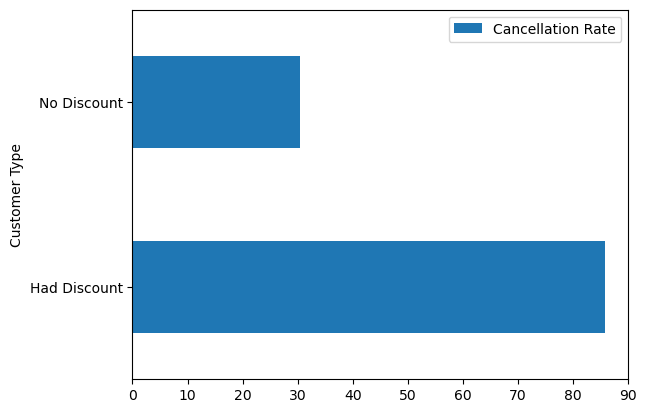

In [179]:
# Visualize the cancellation rate for those with a discount vs those without a discount
pd.DataFrame([['Had Discount', 85.71428571428571], 
            ['No Discount', 30.434782608695656 ]],
            columns = ['Customer Type', 'Cancellation Rate']).plot.barh(x = 'Customer Type', y = 'Cancellation Rate');

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [180]:
# Split the ID in the audio data so the column can be joined with listening_history table
audio.tail()

,ID,Name,Genre,Popularity
12,Podcast-201,Jokes on Jokes,Comedy,2
13,Podcast-202,Laugh Out Loudcast,Comedy,8
14,Podcast-203,The Comedian's Corner,Comedy,20
15,Podcast-204,Crime Chronicles,True Crime,4
16,Podcast-205,Investigating Darkness,True Crime,17


In [181]:
audio.ID

0        Song-101
1        Song-102
2        Song-103
3        Song-104
4        Song-105
5        Song-106
6        Song-107
7        Song-108
8        Song-109
9        Song-110
10       Song-111
11       Song-112
12    Podcast-201
13    Podcast-202
14    Podcast-203
15    Podcast-204
16    Podcast-205
Name: ID, dtype: object

In [182]:
audio["ID"] = audio.ID.str[-3:]
audio.head(3)

,ID,Name,Genre,Popularity
0,101,Dance All Night,Pop,1
1,102,Unbreakable Beat,Pop,2
2,103,Sunset Boulevard,Pop,5


In [183]:
# Even now joining the two tables will cause error as they have different datatypes
# Hint: Check the data type of Audio ID in the audio table
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [184]:
audio["ID"] = pd.to_numeric(audio["ID"])
audio.dtypes

ID             int64
Name          object
Genre         object
Popularity     int64
dtype: object

In [185]:
listening_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [186]:
df = listening_history.merge(audio, how = 'left', left_on = 'Audio ID', right_on = 'ID')
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,105,Pop Rocks,Pop,52


In [187]:
# The number of listening sessions that each customer had in the past 3 months
df.groupby("Customer ID")["Session ID"].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

<AxesSubplot:ylabel='Frequency'>

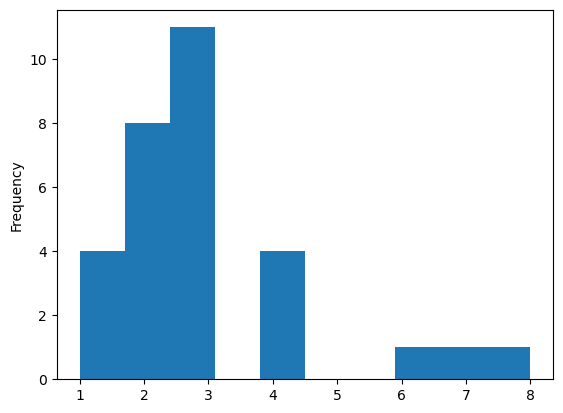

In [188]:
df.groupby("Customer ID")["Session ID"].nunique().plot.hist()

In [189]:
# The most popular genres that customers listened to
df.Genre.value_counts(ascending = False)

Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: Genre, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [190]:
# Create a dataframe ready for modeling
# First lets create a model_df with 3 columns as Customer ID, Discount or not? , Cancelled or Not ?

model_df = customers[['Customer_ID', 'Cancelled', 'Discount?']]
model_df.head()

,Customer_ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [191]:
# Calculate the number of listening sessions for each customer
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,105,Pop Rocks,Pop,52


In [192]:
session_count = df.groupby("Customer ID")["Session ID"].nunique().reset_index().rename(columns = {"Session ID" : "No of Sessions"})
session_count

,Customer ID,No of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4
5,5404,1
6,5581,3
7,5759,2
8,5761,3
9,5763,6


In [193]:
model = model_df.merge(session_count, how = 'left', left_on = 'Customer_ID', right_on = 'Customer ID')
model_df = model.drop(['Customer ID'], axis =1)
model_df.head()

,Customer_ID,Cancelled,Discount?,No of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [194]:
# Percent pop
pd.get_dummies(df.Genre)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [195]:
genres = pd.concat([df["Customer ID"], pd.get_dummies(df.Genre)], axis = 1 )
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0


In [196]:
genres = genres.groupby("Customer ID").sum().reset_index()
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [197]:
listening_history.head()
# Now lets create a column for total songs or podcasts

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [198]:
total_audio = listening_history.groupby("Customer ID")["Audio ID"].count().rename("Total Audio").to_frame().reset_index()
total_audio.head()

# Now lets merge this with genres dataframe

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [199]:
df_audio = pd.concat([genres,total_audio], axis = 1)
df_audio

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Customer ID,Total Audio
0,5001,0,0,26,0,34,0,5001,60
1,5002,0,22,0,0,0,0,5002,22
2,5004,0,0,0,0,9,0,5004,9
3,5267,0,0,22,0,23,0,5267,45
4,5338,0,18,0,0,0,0,5338,18
5,5404,0,0,0,0,8,0,5404,8
6,5581,0,0,0,0,0,5,5581,5
7,5759,0,0,0,0,15,0,5759,15
8,5761,0,0,0,0,0,5,5761,5
9,5763,0,0,11,0,20,0,5763,31


In [200]:
# Now lets finally add % pop to our model_df
model_df.head()

,Customer_ID,Cancelled,Discount?,No of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [201]:
model_df["Percent Pop"] = round(df_audio.Pop/df_audio["Total Audio"] *100,2)

In [202]:
# Percent podcasts
model_df["Percent Podcast"] = round( (df_audio["Comedy"] + df_audio["True Crime"])/ df_audio["Total Audio"]*100 ,2)
model_df

,Customer_ID,Cancelled,Discount?,No of Sessions,Percent Pop,Percent Podcast
0,5001,0,0,8,56.67,0.00
1,5002,0,0,4,0.00,0.00
2,5004,1,0,1,100.00,0.00
3,5267,0,0,7,51.11,0.00
4,5338,0,0,4,0.00,0.00
5,5404,1,0,1,100.00,0.00
6,5581,0,0,3,0.00,100.00
7,5759,1,0,2,100.00,0.00
8,5761,0,0,3,0.00,100.00
9,5763,0,0,6,64.52,0.00


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

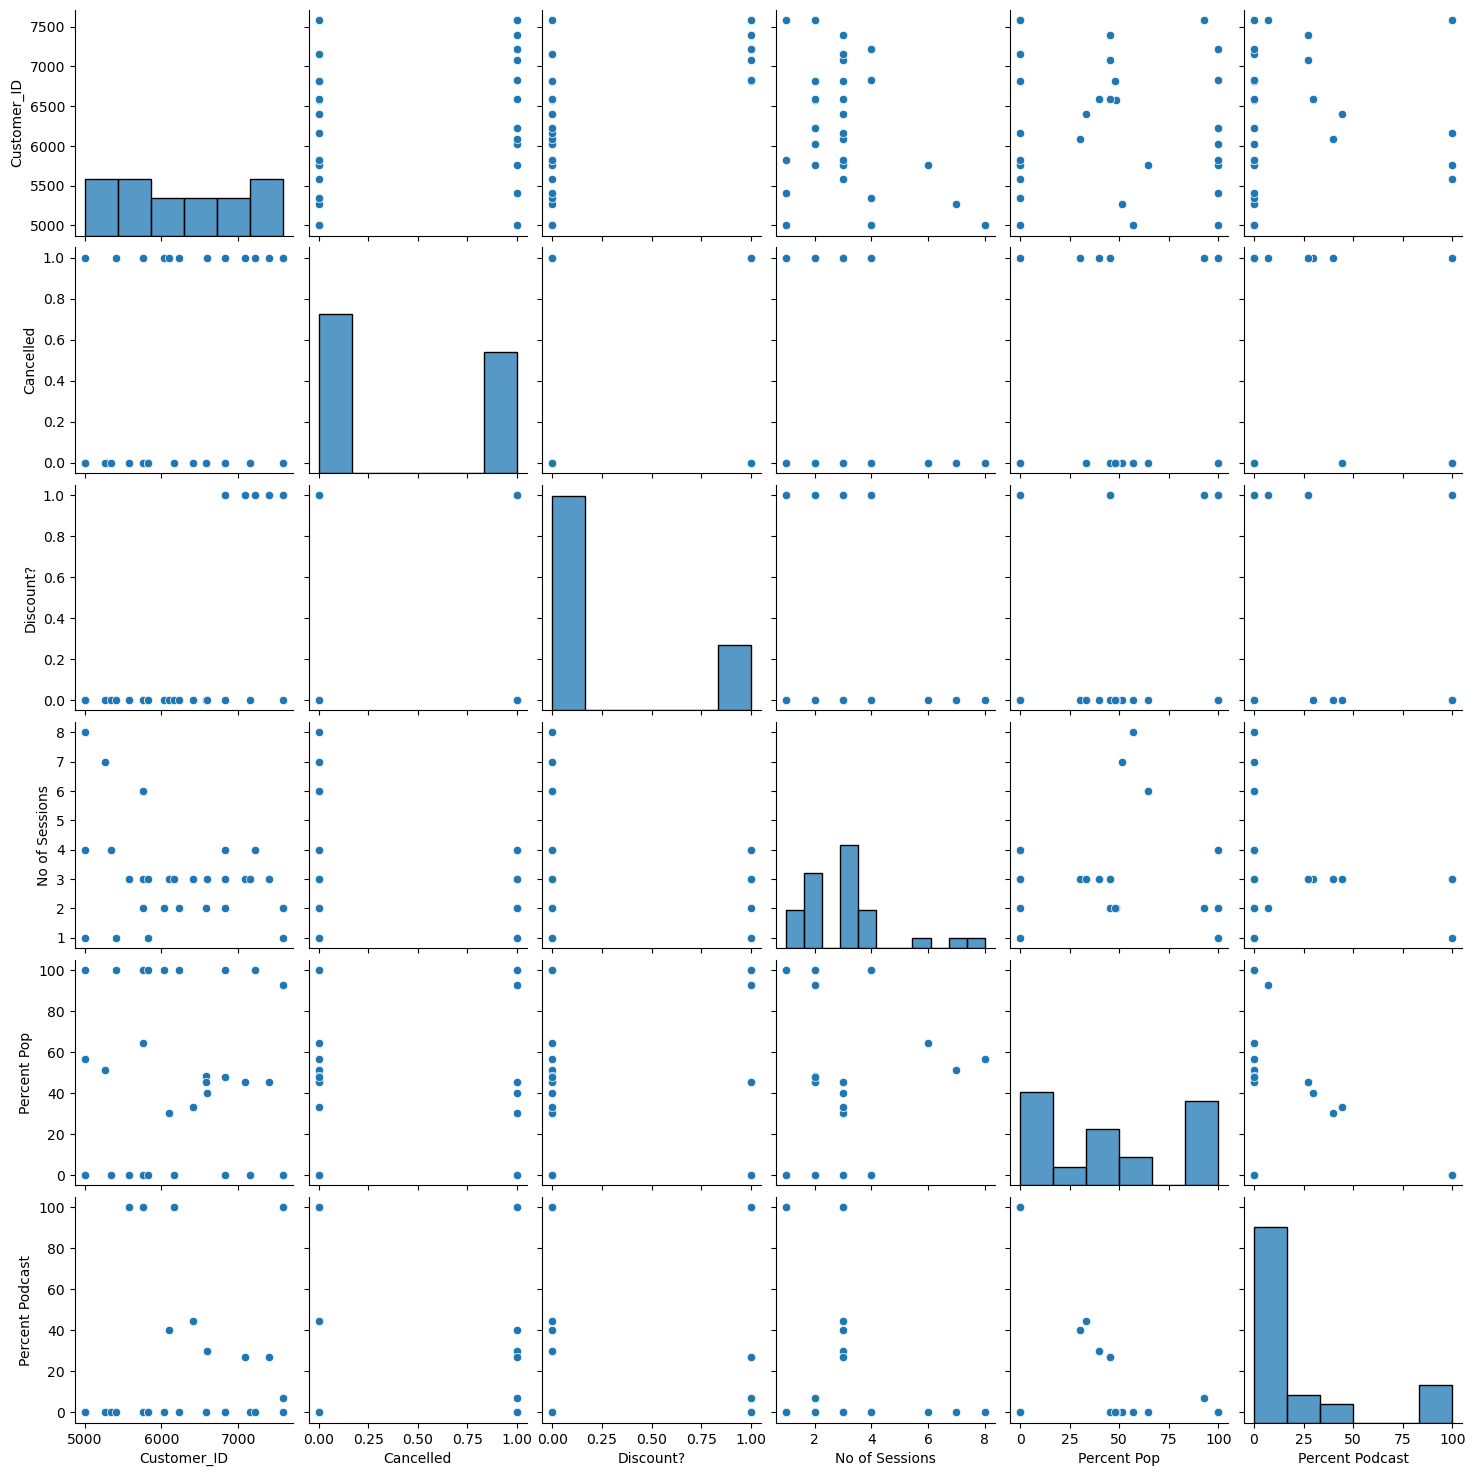

In [203]:
# We will use pair plots to see some relationships
import seaborn as sns
sns.pairplot(model_df)

In [204]:
model_df.corr()

,Customer_ID,Cancelled,Discount?,No of Sessions,Percent Pop,Percent Podcast
Customer_ID,1.000000,0.269942,0.648514,-0.337083,-0.076140,0.083072
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.585620,-0.035419
Discount?,0.648514,0.471825,1.000000,-0.048877,0.112664,0.062925
No of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.131143,-0.125458
Percent Pop,-0.076140,0.585620,0.112664,-0.131143,1.000000,-0.487200
Percent Podcast,0.083072,-0.035419,0.062925,-0.125458,-0.487200,1.000000


In [205]:
# Discount is corelated with cancellation
# More the listening sessions less the cancellations
# The more pop music, the more cancellations